In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
placement = pd.read_csv("Placement_Data_Full_Class.csv")

In [3]:
placement.head(10)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
5,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,252000.0
8,9,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,231000.0
9,10,M,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN


In [4]:
placement_copy=placement.copy()

In [5]:
placement_copy.shape

(215, 15)

In [6]:
placement_copy.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

## NAN Handling

In [7]:
placement_copy.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [8]:
placement_copy['salary'].fillna(value=0 , inplace = True )

In [9]:
placement_copy.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [10]:
placement_copy.drop(['sl_no','ssc_b','hsc_b'], axis = 1 , inplace = True)

In [11]:
placement_copy.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


## Outlier Handling

Text(0.5, 1.0, 'Employability Percentage')

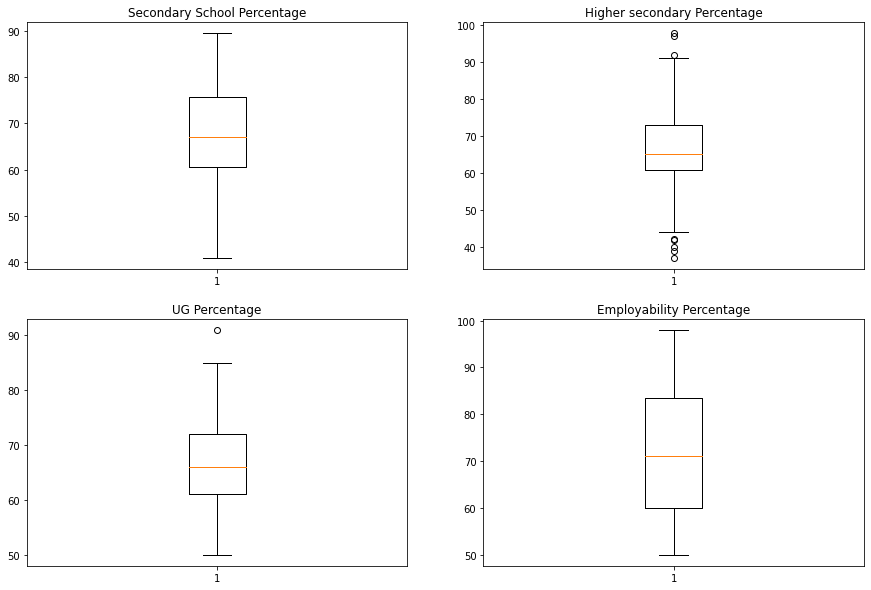

In [12]:
plt.figure(figsize = (15,10))

ax = plt.subplot(221)
plt.boxplot(placement_copy['ssc_p'])
ax.set_title('Secondary School Percentage')

ax = plt.subplot(222)
plt.boxplot(placement_copy['hsc_p'])
ax.set_title('Higher secondary Percentage')

ax = plt.subplot(223)
plt.boxplot(placement_copy['degree_p'])
ax.set_title('UG Percentage')

ax = plt.subplot(224)
plt.boxplot(placement_copy['etest_p'])
ax.set_title('Employability Percentage')

In [13]:
Q1 = placement_copy['hsc_p'].quantile(0.25)
Q3 = placement_copy['hsc_p'].quantile(0.75)
IQR = Q3 - Q1

filter = (placement_copy['hsc_p'] >= Q1 - 1.5 * IQR) & (placement_copy['hsc_p']<= Q3+ 1.5*IQR)
placement_filtered= placement_copy.loc[filter]

{'whiskers': [<matplotlib.lines.Line2D at 0x19144c99e50>,
 'caps': [<matplotlib.lines.Line2D at 0x19144ca75b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x19144c99ac0>],
 'medians': [<matplotlib.lines.Line2D at 0x19144ca7cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19144cb30a0>],
 'means': []}

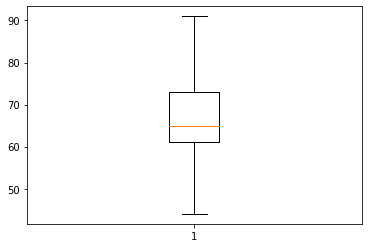

In [14]:
plt.boxplot(placement_filtered['hsc_p'])

## Data Visualization

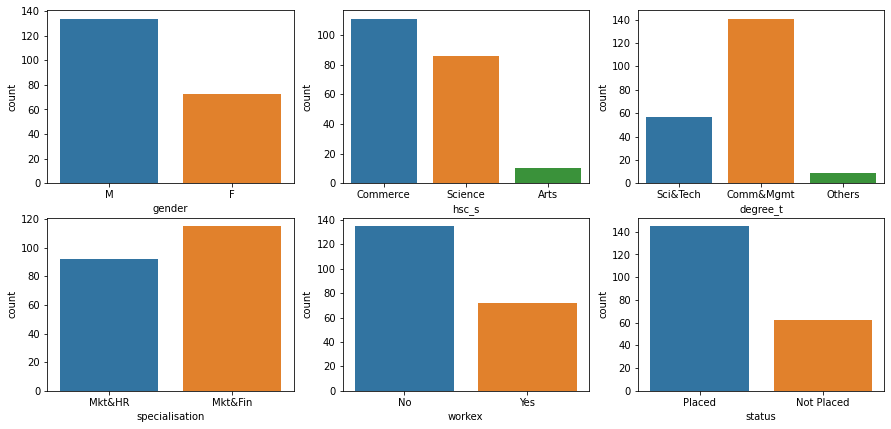

In [15]:
plt.figure(figsize = (15,7))

plt.subplot(231)
ax = sns.countplot(x= 'gender' , data = placement_filtered)

plt.subplot(232)
ax = sns.countplot(x= 'hsc_s' , data = placement_filtered)

plt.subplot(233)
ax = sns.countplot(x= 'degree_t' , data = placement_filtered)

plt.subplot(234)
ax = sns.countplot(x= 'specialisation' , data = placement_filtered)

plt.subplot(235)
ax = sns.countplot(x= 'workex' , data = placement_filtered)

plt.subplot(236)
ax = sns.countplot(x= 'status' , data = placement_filtered)


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='salary', ylabel='Density'>

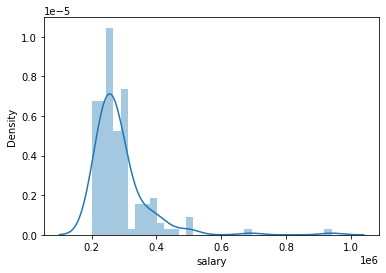

In [16]:
placement_placed = placement_filtered[placement_filtered.salary!= 0]
sns.distplot(placement_placed['salary'])

In [17]:
import plotly_express as px
px.violin(placement_placed,y="salary",x="specialisation",color="gender",box=True,points="all")

ModuleNotFoundError: No module named 'plotly_express'

## Encoding

In [ ]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

object_cols= ['gender','workex','specialisation','status']

label_encoder = LabelEncoder()

for col in object_cols:
    placement_filtered[col]= label_encoder.fit_transform(placement_filtered[col])
    
placement_filtered.head(10)


In [ ]:
# One Hot Encoding 
dummy_hsc_s = pd.get_dummies(placement_filtered['hsc_s'], prefix = 'dummy')
dummy_degree_t = pd.get_dummies(placement_filtered['degree_t'], prefix = 'dummy')

placement_coded = pd.concat([placement_filtered , dummy_hsc_s , dummy_degree_t],axis = 1)
placement_coded.drop(['hsc_s','degree_t','salary'],axis = 1 , inplace = True)
placement_coded.head()

## Splitting Data

In [ ]:
X = placement_coded.drop(['status'],axis=1)
y = placement_coded.status

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y , train_size = 0.8 , random_state = 1)

## Classification Models

In [ ]:
#Logistic Regression - 
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()

logreg.fit(X_train , y_train)

y_pred = logreg.predict(X_test)

print(logreg.score(X_test , y_test))

In [ ]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier 

dt = DecisionTreeClassifier(criterion = 'gini' , max_depth = 3)

dt = dt.fit(X_train , y_train)
y_pred = dt.predict(X_test)

print("Accuracy", metrics.accuracy_score(y_test , y_pred))

In [ ]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rt = RandomForestClassifier(n_estimators = 100)

rt.fit(X_train , y_train)
y_pred = rt.predict(X_test)

print("Accuracy", metrics.accuracy_score(y_test , y_pred))